#Cwiczenie 2 - 
wytranuj siec by potrafila odrozniac recznie napisane znaki
z datasetu MNIST

In [1]:
import keras
import matplotlib.pyplot as plt

#Importuj dane treningowe i testowe oraz pokaz przykladowe dane
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
plt.imshow(x_train[0])
plt.show()

Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

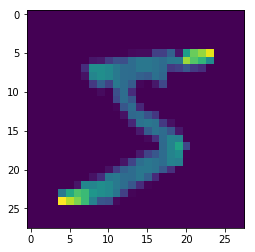

In [2]:
#normalizuj dane i pokaz ze troche to wyblaklo
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0])
plt.show()

In [3]:
# przeksztalc dane z wymiarow (ilosc_probek, wysokosc, szerokosc)
# na (ilosc_probek, wysokosc * szerokosc)
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
# 0,1,2,3,4,5,6,7,8,9 sa kategoriami nie wartosciami, wiec tez o to zadbaj



In [4]:
from keras.layers import Dense, Flatten
from keras import optimizers

model = keras.Sequential()

model.add(Dense(128, input_shape=(784,), activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train,y_train, epochs = 5, batch_size=100)

valid_test, valid_acc = model.evaluate(x_test, y_test)

print("Loss walidacji:        ", valid_test)
print("Poprawnosc Walidacji:  ", valid_acc*100,"%")

Epoch 1/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0495 - acc: 0.9844
Epoch 2/5
60000/60000 [==============================] - 2s 42us/step - loss: 0.0370 - acc: 0.9885
Epoch 3/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0290 - acc: 0.9911
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0227 - acc: 0.9935
Epoch 5/5
10000/10000 [==============================] - 0s 32us/step
Loss walidacji:         0.09427306984661263
Poprawnosc Walidacji:   97.53 %
